**Deep Learning Lab Midterm**  

[1] Import Required Libraries & Load CIFAR-10 Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import EarlyStopping

# Constants
NUM_CLASSES = 10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(f"Original shape of training data: {x_train.shape}")
print(f"Original shape of test data: {x_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Original shape of training data: (50000, 32, 32, 3)
Original shape of test data: (10000, 32, 32, 3)


[2] Preprocess Data

In [2]:
# Normalize image data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Resize to fit Xception model requirement
x_train = tf.image.resize(x_train, (75, 75))
x_test = tf.image.resize(x_test, (75, 75))

# One-hot encode labels
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

print(f"Resized training data shape: {x_train.shape}")
print(f"One-hot encoded label shape: {y_train.shape}")


Resized training data shape: (50000, 75, 75, 3)
One-hot encoded label shape: (50000, 10)


[3] Build Model Using Xception

In [3]:
# Load pre-trained Xception base model without the top classifier layers
base_model = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(75, 75, 3),
    pooling="avg"
)
base_model.trainable = False  # Freeze convolutional base

# Add custom layers on top of the base model
input_layer = layers.Input(shape=(75, 75, 3))
x = base_model(input_layer, training=False)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)
model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,388,594 (81.59 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

[4] Compile the Model

In [4]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

print("Model compiled with Adam optimizer (lr=0.001) and categorical crossentropy loss.")


Model compiled with Adam optimizer (lr=0.001) and categorical crossentropy loss.


[5] Train the Model (Initial Training Phase)

In [5]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(x_test, y_test),
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    shuffle=True,
)

print("Initial training completed.")


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 55ms/step - accuracy: 0.6052 - loss: 1.1999 - val_accuracy: 0.7150 - val_loss: 0.8232
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7102 - loss: 0.8417 - val_accuracy: 0.7291 - val_loss: 0.7754
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7358 - loss: 0.7660 - val_accuracy: 0.7373 - val_loss: 0.7605
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7502 - loss: 0.7155 - val_accuracy: 0.7401 - val_loss: 0.7466
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.7582 - loss: 0.6849 - val_accuracy: 0.7380 - val_loss: 0.7584
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.7762 - loss: 0.6360 - val_accuracy: 0.7459 - val_loss: 0.7402
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.7837 - loss: 0.6133 - val_accuracy: 0.7461 - val_loss: 0.7429
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.7919 - loss: 0.5785 - 

[6] Fine-Tuning the Model

In [6]:
# Unfreeze the base model
base_model.trainable = True

# Compile with smaller learning rate for fine-tuning
opt_fine = optimizers.Adam(learning_rate=1e-5)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt_fine,
    metrics=["accuracy"]
)

# Continue training
history_fine = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[EarlyStopping(patience=2, restore_best_weights=True)],
    shuffle=True,
)

print("Fine-tuning completed.")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 162ms/step - accuracy: 0.5801 - loss: 1.2212 - val_accuracy: 0.7967 - val_loss: 0.6120
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 131ms/step - accuracy: 0.8058 - loss: 0.5674 - val_accuracy: 0.8338 - val_loss: 0.5047
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.8574 - loss: 0.4176 - val_accuracy: 0.8543 - val_loss: 0.4456
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 137ms/step - accuracy: 0.8890 - loss: 0.3219 - val_accuracy: 0.8640 - val_loss: 0.4156
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 131ms/step - accuracy: 0.9106 - loss: 0.2575 - val_accuracy: 0.8723 - val_loss: 0.4014
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.9285 - loss: 0.2019 - val_accuracy: 0.8742 - val_loss: 0.4091
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.9446 - loss: 0.1604 - val_accuracy: 0.8809 - val_loss: 0.3986
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.9595 -

[7] Evaluate and Visualize Predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 594ms/step - accuracy: 0.8807 - loss: 0.4050
Test Accuracy: 88.09%
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


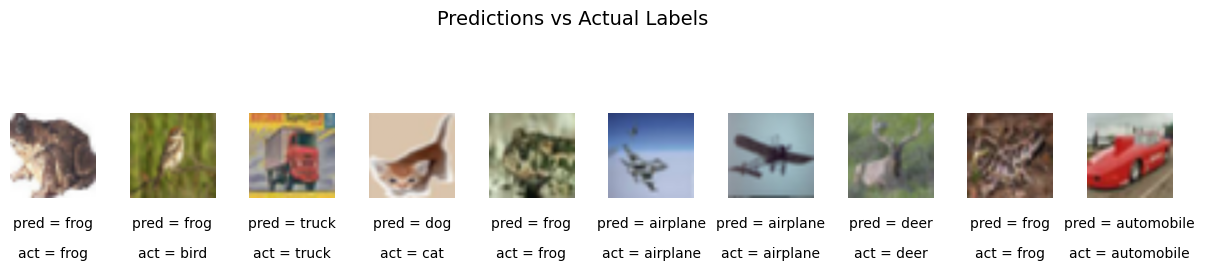

In [8]:
# Evaluate model on test set
loss, acc = model.evaluate(x_test, y_test, batch_size=1000)
print(f"Test Accuracy: {acc*100:.2f}%")

# Make predictions and compare with actual
CLASSES = np.array([
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

# Visualize 10 predictions
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx].numpy()
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred = " + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, "act = " + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(img)

plt.suptitle("Predictions vs Actual Labels", fontsize=14)
plt.show()
